In [1]:
from scipy.stats import linregress
import pandas as pd
import statsmodels.formula.api as smf

df = pd.read_excel(r'H:\Mi unidad\TRABAJO\ANALISIS CARACTERISTICAS DEL AGENTE RENTABLE\Data_agenteproductivo.xlsx')
# Dividimos por Zonas

In [2]:
# GENERAL
GENERAL=df
GENERAL = smf.ols("TRX_TOTALES ~ ZONA + Recargas + Vida + MCC + BN + IBK + BBVA + BCP + FULLC + REDD + WEST", data=GENERAL).fit()
df_GENERAL=pd.DataFrame(GENERAL.params)
df_GENERAL=df_GENERAL.reset_index()
df_GENERAL=df_GENERAL.rename(columns={'index': 'Variable',0:"Coeficiente"})
df_GENERAL=df_GENERAL.sort_values("Coeficiente", ascending=False)
#No se pone otro indice porque no lee el seaborn
#df_GENERAL = df_GENERAL.set_index('Variable')

# NORTE
NORTE=df[df["SUBREGION"]=="NORTE"]
NORTE = smf.ols("TRX_TOTALES ~ ZONA + Recargas + Vida + MCC + BN + IBK + BBVA + BCP + FULLC + REDD + WEST", data=NORTE).fit()
df_NORTE=pd.DataFrame(NORTE.params)
df_NORTE=df_NORTE.reset_index()
df_NORTE=df_NORTE.rename(columns={'index': 'Variable',0:"Coeficiente"})
df_NORTE=df_NORTE.sort_values("Coeficiente", ascending=False)

# SUR
SUR=df[df["SUBREGION"]=="SUR"]
SUR = smf.ols("TRX_TOTALES ~ ZONA + Recargas + Vida + MCC + BN + IBK + BBVA + BCP + FULLC + REDD + WEST", data=SUR).fit()
df_SUR=pd.DataFrame(SUR.params)
df_SUR=df_SUR.reset_index()
df_SUR=df_SUR.rename(columns={'index': 'Variable',0:"Coeficiente"})
df_SUR=df_SUR.sort_values("Coeficiente", ascending=False)

# LIMA
LIMA=df[df["SUBREGION"]=="LIMA"]
LIMA = smf.ols("TRX_TOTALES ~ ZONA + Recargas + Vida + MCC + BN + IBK + BBVA + BCP + FULLC + REDD + WEST", data=LIMA).fit()
df_LIMA=pd.DataFrame(LIMA.params)
df_LIMA=df_LIMA.reset_index()
df_LIMA=df_LIMA.rename(columns={'index': 'Variable',0:"Coeficiente"})
df_LIMA=df_LIMA.sort_values("Coeficiente", ascending=False)

# CENTRO
CENTRO=df[df["SUBREGION"]=="CENTRO"]
CENTRO = smf.ols("TRX_TOTALES ~ ZONA + Recargas + Vida + MCC + BN + IBK + BBVA + BCP + FULLC + REDD + WEST", data=CENTRO).fit()
df_CENTRO=pd.DataFrame(CENTRO.params)
df_CENTRO=df_CENTRO.reset_index()
df_CENTRO=df_CENTRO.rename(columns={'index': 'Variable',0:"Coeficiente"})
df_CENTRO=df_CENTRO.sort_values("Coeficiente", ascending=False)

# GUARDAMOS
writer = pd.ExcelWriter("H:\Mi unidad\TRABAJO\ANALISIS CARACTERISTICAS DEL AGENTE RENTABLE\COEFICIENTES.xlsx", engine='xlsxwriter')
df_CENTRO.to_excel(writer,sheet_name="CENTRO")
df_SUR.to_excel(writer,sheet_name="SUR")
df_LIMA.to_excel(writer,sheet_name="LIMA")
df_NORTE.to_excel(writer,sheet_name="NORTE")
writer.save()

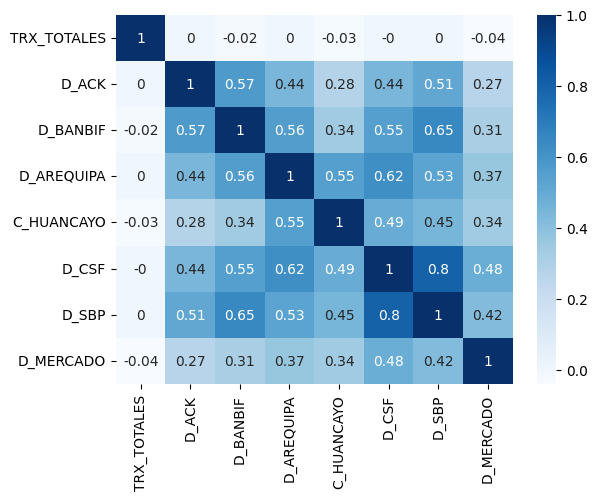

<AxesSubplot:>

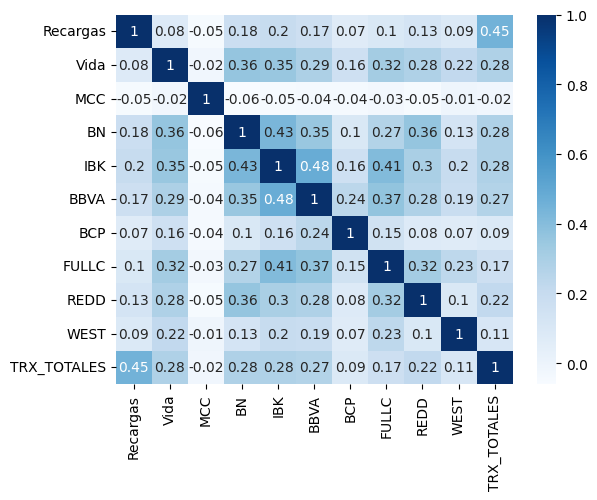

In [3]:
import matplotlib.pyplot as plt
# Seleleccionamos las columnas
correlacion1 = df[["TRX_TOTALES","D_ACK","D_BANBIF", "D_AREQUIPA" , "C_HUANCAYO","D_CSF", "D_SBP","D_MERCADO"]]

# Hallamos la correlación
correlacion1=correlacion1.corr().round(2)
#correlacion=pd.DataFrame(correlacion["TRX_TOTALES"]).reset_index()
#correlacion=correlacion.rename(columns={'index': 'Variable',"TRX_TOTALES":"Correlación con las TRX"})
#correlacion=correlacion[correlacion["Variable"]!="TRX_TOTALES"]
#correlacion=correlacion.sort_values("Correlación con las TRX", ascending=False)

import seaborn as sns
sns.heatmap(correlacion1, annot=True,cmap="Blues")
plt.show()
correlacion2 = df[["ZONA","Recargas", "Vida" , "MCC","BN", "IBK","BBVA" ,"BCP" , "FULLC" ,"REDD" , "WEST","TRX_TOTALES"]]
correlacion2=correlacion2.corr().round(2)
plt.show()
sns.heatmap(correlacion2, annot=True,cmap="Blues")


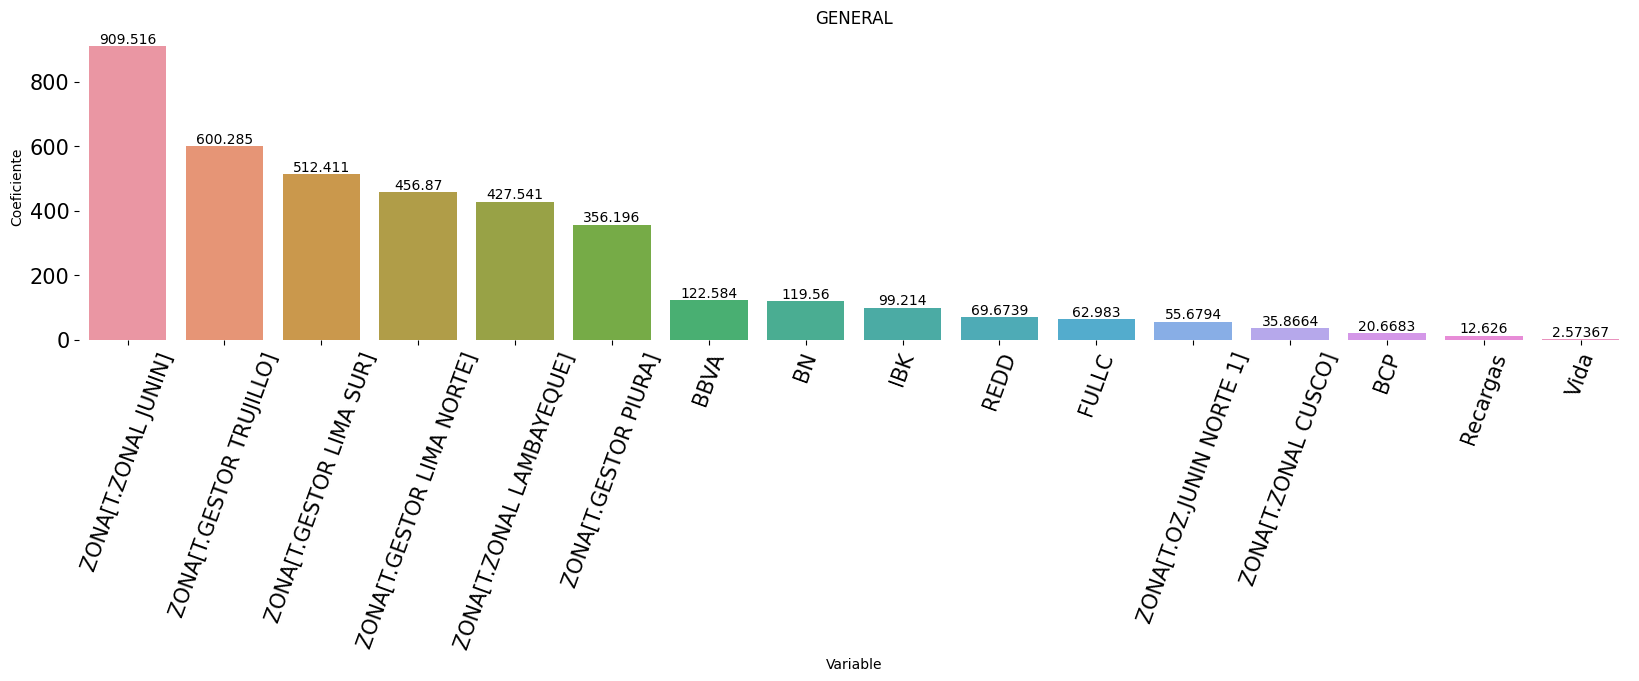

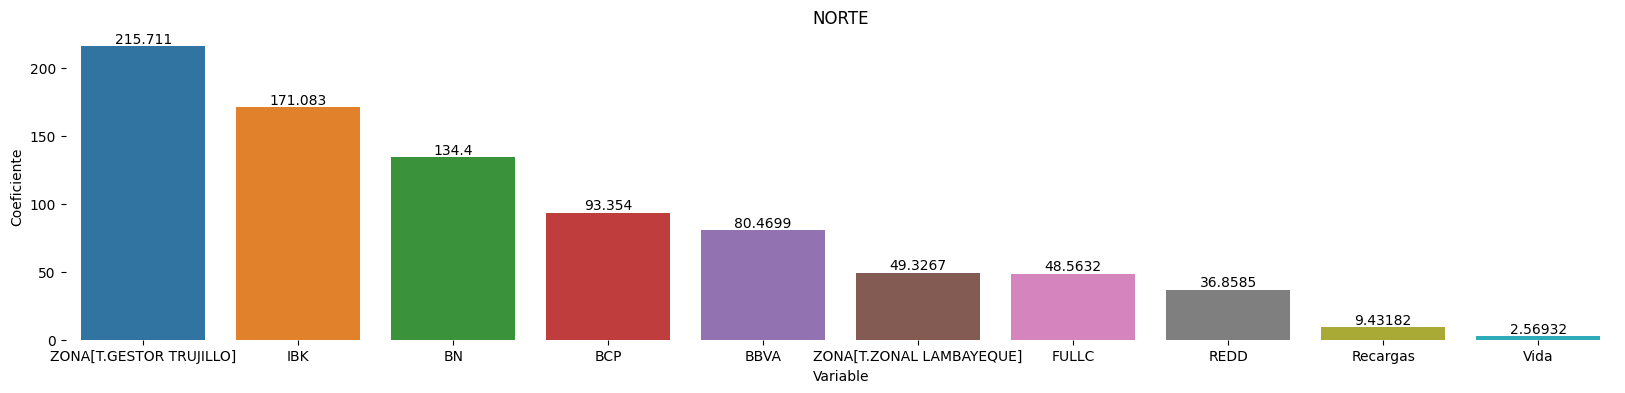

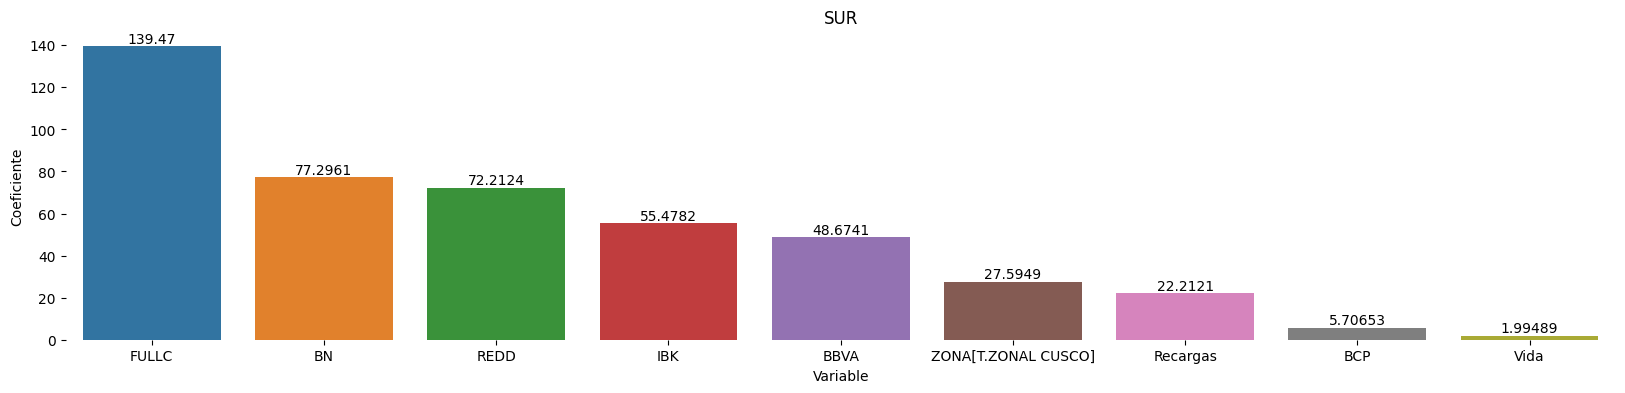

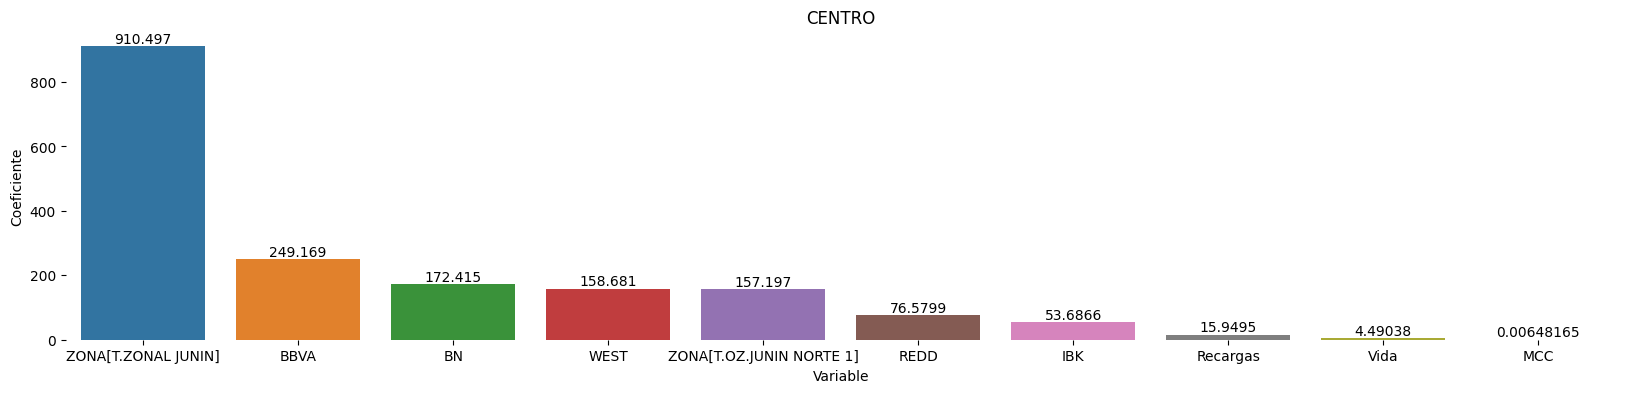

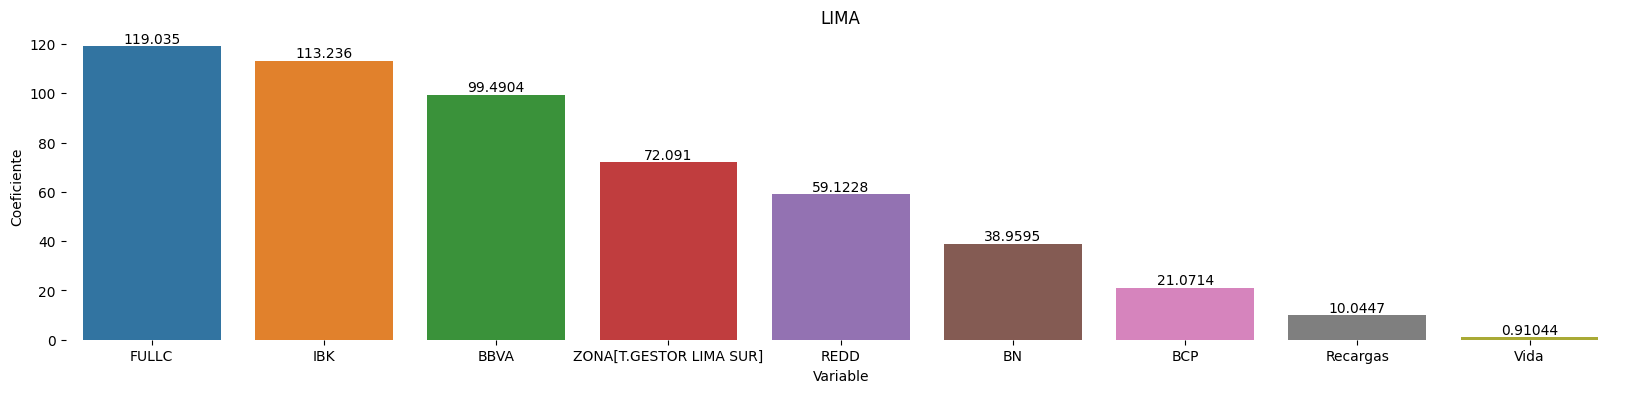

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# GRAFICAMOS
#GENERAL
# TAMAÑO
plt.figure(figsize=(20,4))
df_GENERAL=df_GENERAL[(df_GENERAL["Coeficiente"]>0) & (df_GENERAL["Variable"]!="Intercept")]
GENERAL=sns.barplot(x = 'Variable', y = 'Coeficiente',data = df_GENERAL)
GENERAL.bar_label(GENERAL.containers[0])
GENERAL.title.set_text('GENERAL')
plt.xticks(rotation=70)
GENERAL.tick_params(labelsize=15)
GENERAL=sns.despine(left=True, bottom=True)
plt.show()

#NORTE
# TAMAÑO
plt.figure(figsize=(20,4))
df_NORTE=df_NORTE[(df_NORTE["Coeficiente"]>0) & (df_NORTE["Variable"]!="Intercept")]
NORTE=sns.barplot(x = 'Variable', y = 'Coeficiente',data = df_NORTE)
NORTE.bar_label(NORTE.containers[0])
NORTE.title.set_text('NORTE')
NORTE=sns.despine(left=True, bottom=True)
plt.show()
#SUR
# TAMAÑO
plt.figure(figsize=(20,4))
df_SUR=df_SUR[(df_SUR["Coeficiente"]>0) & (df_SUR["Variable"]!="Intercept")]
SUR=sns.barplot(x = 'Variable', y = 'Coeficiente',data = df_SUR)
SUR.bar_label(SUR.containers[0])
SUR.title.set_text('SUR')
SUR=sns.despine(left=True, bottom=True)
plt.show()
#CENTRO
# TAMAÑO
plt.figure(figsize=(20,4))
df_CENTRO=df_CENTRO[(df_CENTRO["Coeficiente"]>0) & (df_CENTRO["Variable"]!="Intercept")]
CENTRO=sns.barplot(x = 'Variable', y = 'Coeficiente',data = df_CENTRO)
CENTRO.bar_label(CENTRO.containers[0])
CENTRO.title.set_text('CENTRO')
CENTRO=sns.despine(left=True, bottom=True)
plt.show()
#LIMA
# TAMAÑO
plt.figure(figsize=(20,4))
df_LIMA=df_LIMA[(df_LIMA["Coeficiente"]>0) & (df_LIMA["Variable"]!="Intercept")]
LIMA=sns.barplot(x = 'Variable', y = 'Coeficiente',data = df_LIMA)
LIMA.bar_label(LIMA.containers[0])
LIMA.title.set_text('LIMA')
LIMA=sns.despine(left=True, bottom=True)
plt.show()


15945


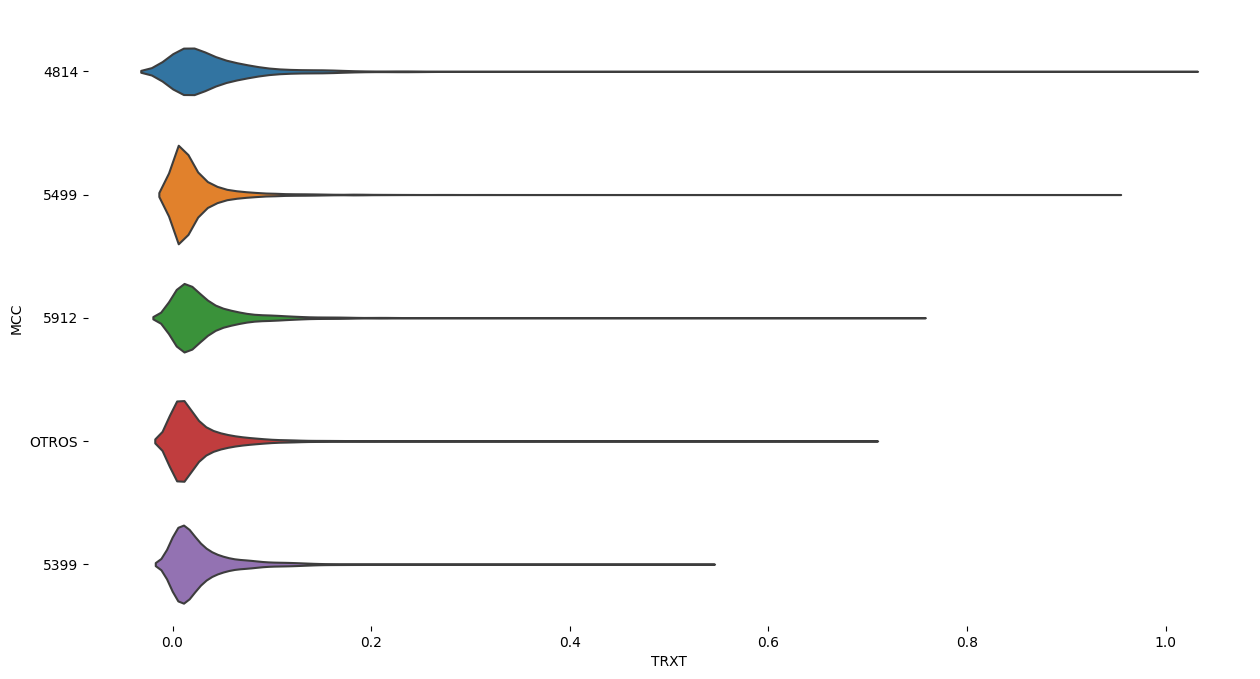

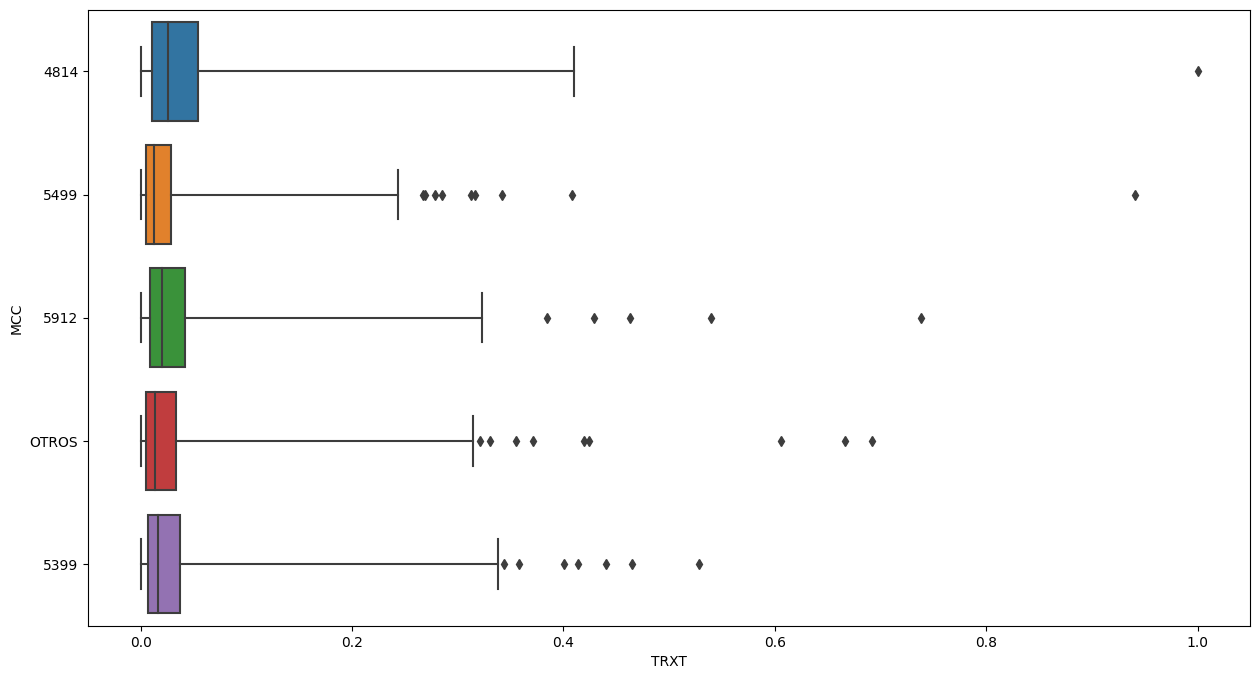

In [219]:

import seaborn as sns
plt.figure(figsize=(15,8))

# GRAFICAMOS
print(df["TRXT"].max())
max=df["TRXT"].max()
min=df["TRXT"].min()
x=df["TRXT"]
df["TRXT"]=(x-min)/(max-min)

data = df.dropna(subset=['TRXT', "MCC"])
sns.violinplot(x="TRXT", y='MCC', data=data, inner=None)
sns.despine(left=True, bottom=True)
plt.show()

plt.figure(figsize=(15,8))
sns.boxplot(x="TRXT", y='MCC', data=data, whis=10)
plt.show()